# Simulating the Super Bowl 2018

On February 4th 2018 almost the entire world has got its eyes on Minneapolis to witness one of the biggest sport events. Since Monday is a workday and the game starts it is 00:30 am in Germany, I would like to know beforehand whether the game will be worth it to watch, since my schedule on Monday is extremely tight and let's face it, I am not longer 20 and I need and enjoy my sleep. So I want to make a prediction for the game based on the Team data of the expired season 2017/18.

In [20]:
# Load libraries
library(ggplot2)
library(ggthemes)
library(dplyr)
library(tidyr)
library(stringr)
library(reshape2)
# Set figure size
options(repr.plot.width=6, repr.plot.height=5)

## Getting and Preprocessing the data

I downloaded the teamstats from this website: https://sports.yahoo.com/nfl/stats/team/?selectedTable=1 and saved it as a *.tsv file. 

In [21]:
# Read in data
offense <- read.csv("offense_2017.tsv", sep = "\t")

# calculate ToP.G in seconds
offense$ToP.G <- as.character(offense$ToP.G)
offense$ToP.G <- as.numeric(substr(offense$ToP.G,1,2))*60 + as.numeric(substr(offense$ToP.G,4,5))

# Convert PYds to num
offense$PYds <- as.character(offense$PYds)
offense$PYds <-  str_replace_all(offense$PYds, ",", "")
offense$PYds <- as.numeric(offense$PYds)

# show a glimpse of the data
head(offense)

Team,G,Pts.G,Yds.G,PasY.G,RusY.G,X1stD.G,X3rdM,X3rdD.,X4thM,X4thD.,PEN,PYds,ToP.G
LA Rams,16,29.9,373.5,251.4,122.1,19.4,88,41.1,5,41.7,107,922,1806
New England,16,28.6,406.8,288.7,118.1,24.3,82,40.6,8,61.5,95,835,1837
Philadelphia,16,28.6,380.1,247.9,132.2,21.1,96,41.7,17,65.4,116,962,1961
New Orleans,16,28.0,400.3,270.9,129.4,20.8,73,37.6,12,80.0,105,962,1888
Jacksonville,16,26.1,373.6,232.3,141.4,20.8,85,37.4,10,76.9,112,936,1932
Kansas City,16,25.9,389.3,270.4,118.9,20.1,78,39.2,3,30.0,118,1044,1855


In [22]:
# Read in data
defense <- read.csv("defense_2017.tsv", sep = "\t")
# Show a glimpse of the data
head(defense)

Team,G,Pts.G,Yds.G,RushYds.G,PassYds.G,Int,IntTD,FF,DefTD,Total,PD,Sack
Minnesota,16,15.8,275.9,83.6,192.4,14,1,6,1,558,71,37
Jacksonville,16,16.8,286.1,116.3,169.9,21,2,17,7,633,81,55
LA Chargers,16,17.0,328.4,131.1,197.3,18,2,13,3,699,79,43
Philadelphia,16,18.4,306.5,79.2,227.3,19,1,13,5,599,92,38
New England,16,18.5,366.0,114.8,251.3,12,0,9,0,682,67,42
Baltimore,16,18.9,325.1,111.3,213.8,22,3,16,5,667,83,41


In [23]:
# Combine the data
combined <- offense %>%
    left_join(defense, by = "Team")

# Rename Columns
colnames(combined) <- c("Team", "Games", "PointsPerGame", "YardsPerGame", "PassYardsPerGame", "RushYardsPerGame", "FirstDownsPerGame", 
                        "ThirdDownConv", "ThirdDownConvPer", "FourthDownConv", "FourthDownConvPer", "OffPen", "OffPenYards", "TimeOfPossesion",
                        "Games2", "PointsAllowedPerGame", "YardsAllowedPerGame", "RushYardsAllowedPerGame", "PassYardsAllowedPerGame",
                        "Interceptions", "InterceptionTouchdowns", "ForcedFumbles", "DefTouchdowns", "Tackles", "PassesDefended", "Sacks")

# Delete duplicate Data
combined <- combined %>% select(-Games2)

# Create Column to mark Teams that made it to the superbowl
combined <- combined %>%
    mutate(Superbowl = ifelse(Team == 'Philadelphia', 'Eagles', ifelse(Team == 'New England', 'Patriots', 'dropped out')))

In [24]:
# Set Teamcolors for Visualization: https://teamcolorcodes.com
colors <- c('#A2AAAD',
            '#004851', # Philly
            '#0C2340') # Patriots

# Analysis

Well you know what they say, "The offense wins the games, but the defense the championship", but since the super bowl is just one game, I guess we have to look on both stats.

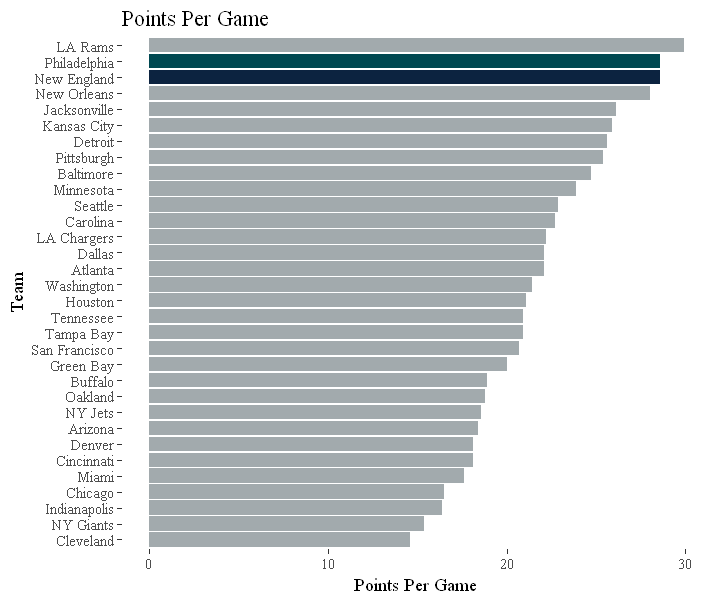

In [25]:
combined %>%
    ggplot(aes( x = reorder(Team, PointsPerGame), y = PointsPerGame, fill = Superbowl)) +
    geom_bar(stat = "identity") +
    coord_flip() +
    ggtitle("Points Per Game") +
    xlab("Team") +
    ylab("Points Per Game") + 
    scale_fill_manual(values=colors, guide = F) +
    theme_tufte()

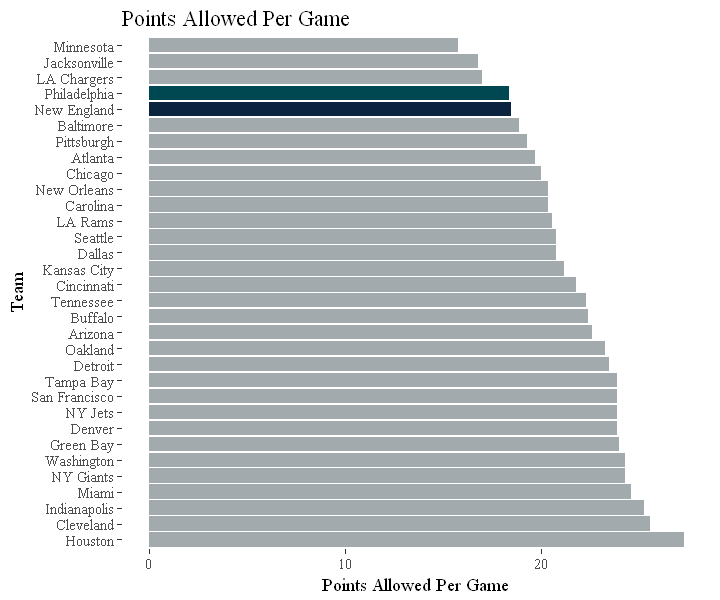

In [26]:
combined %>%
    ggplot(aes( x = reorder(Team, -PointsAllowedPerGame), y = PointsAllowedPerGame, fill = Superbowl)) +
    geom_bar(stat = "identity") +
    coord_flip() +
    ggtitle("Points Allowed Per Game") +
    xlab("Team") +
    ylab("Points Allowed Per Game") + 
    scale_fill_manual(values=colors, guide = F) +
    theme_tufte()

Both teams nearly scored and allowed the same number of points in the last season. Both teams are definetively worthy teams on the super bowl. But this makes the prediction even harder. So we have to delve deeper in to the data.

In [27]:
# Compare offense
combined %>%
    filter(Superbowl != 'dropped out') %>%
    select(Team, PointsPerGame, YardsPerGame, PassYardsPerGame, RushYardsPerGame, FirstDownsPerGame, 
                        ThirdDownConv, ThirdDownConvPer, FourthDownConv, FourthDownConvPer, OffPen, OffPenYards, TimeOfPossesion)

Team,PointsPerGame,YardsPerGame,PassYardsPerGame,RushYardsPerGame,FirstDownsPerGame,ThirdDownConv,ThirdDownConvPer,FourthDownConv,FourthDownConvPer,OffPen,OffPenYards,TimeOfPossesion
New England,28.6,406.8,288.7,118.1,24.3,82,40.6,8,61.5,95,835,1837
Philadelphia,28.6,380.1,247.9,132.2,21.1,96,41.7,17,65.4,116,962,1961


In [28]:
# Compare Defense
combined %>%
    filter(Superbowl != 'dropped out') %>%
    select(Team, PointsAllowedPerGame, YardsAllowedPerGame, RushYardsAllowedPerGame, PassYardsAllowedPerGame,
                        Interceptions, InterceptionTouchdowns, ForcedFumbles, DefTouchdowns, Tackles, PassesDefended, Sacks)

Team,PointsAllowedPerGame,YardsAllowedPerGame,RushYardsAllowedPerGame,PassYardsAllowedPerGame,Interceptions,InterceptionTouchdowns,ForcedFumbles,DefTouchdowns,Tackles,PassesDefended,Sacks
New England,18.5,366.0,114.8,251.3,12,0,9,0,682,67,42
Philadelphia,18.4,306.5,79.2,227.3,19,1,13,5,599,92,38


In [29]:
# Write function to compare the Teams
compare_teams <- function(col) {
    options(repr.plot.width=3, repr.plot.height=3)
    text_y <- max(combined[combined$Superbowl != 'dropped out', col])/3
    
    combined %>%
    filter(Superbowl != 'dropped out') %>%
    ggplot(aes_string(x = "Team", y = col, fill = "Superbowl")) +
    geom_bar(stat = 'identity') +
    ggtitle(col) +
    xlab("Team") +
    ylab(col) + 
    scale_fill_manual(values=colors[2:3], guide = F) +
    geom_text(aes_string(x = "Team", y = as.character(text_y), label = col),color = 'white', size = 7) +
    theme_tufte()
}

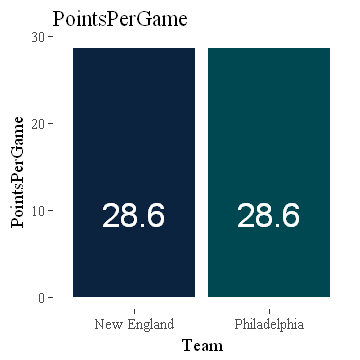

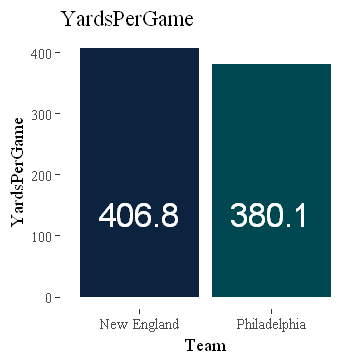

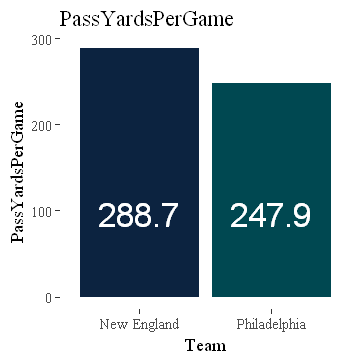

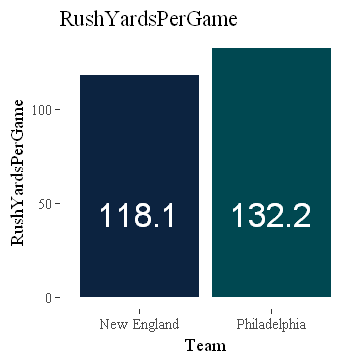

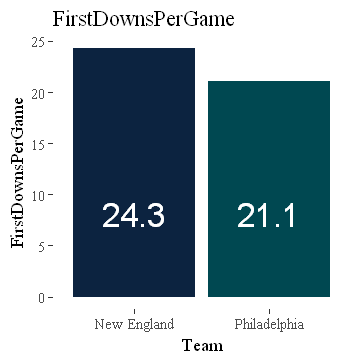

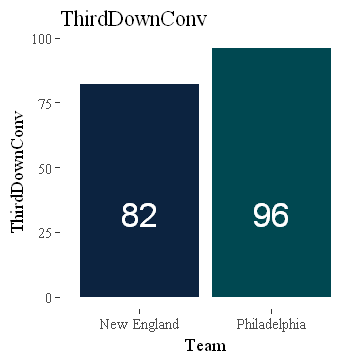

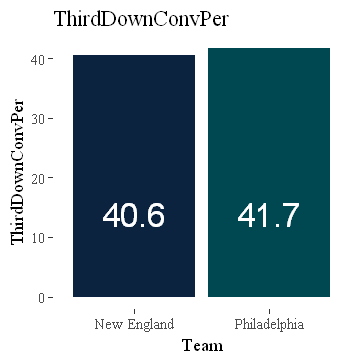

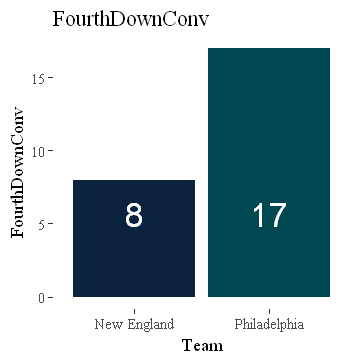

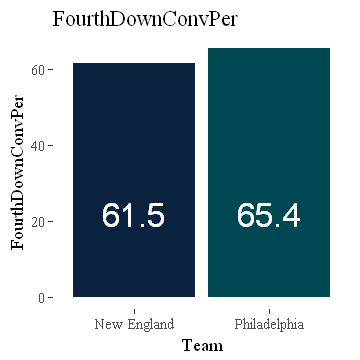

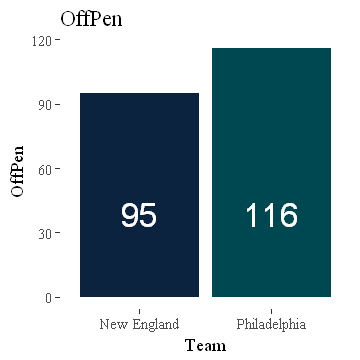

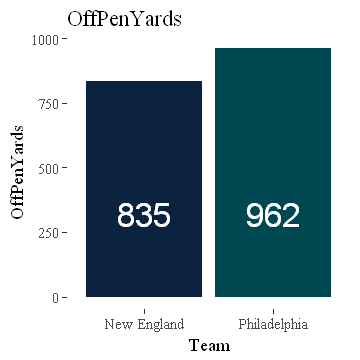

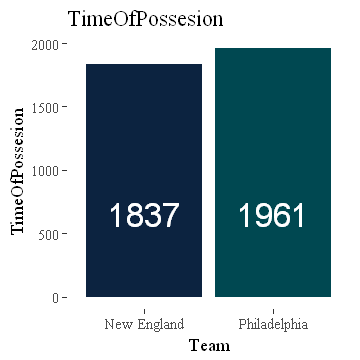

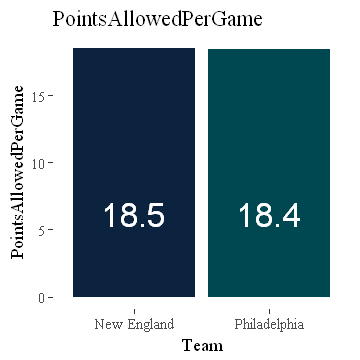

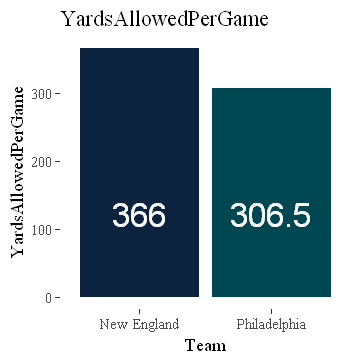

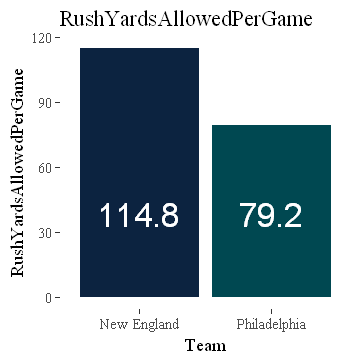

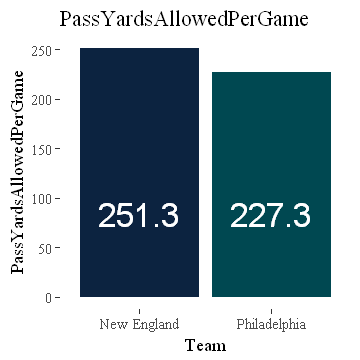

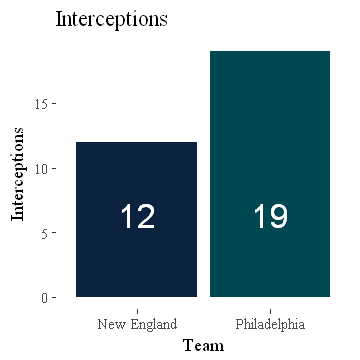

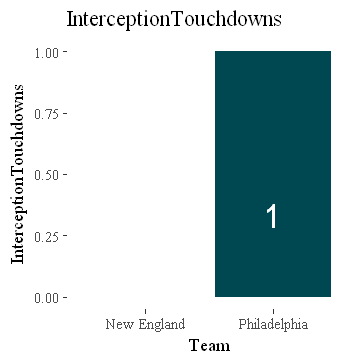

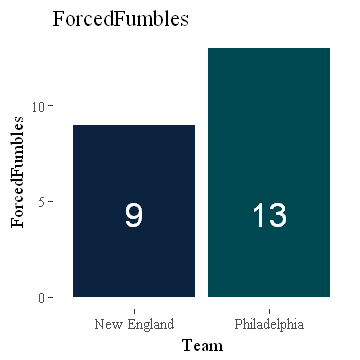

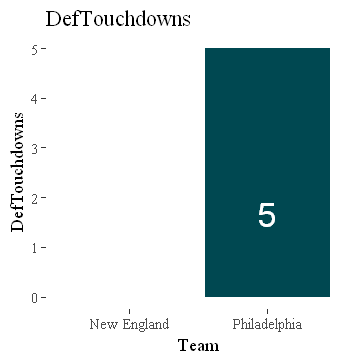

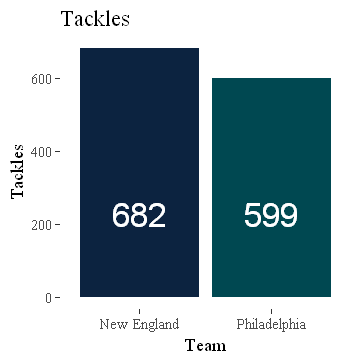

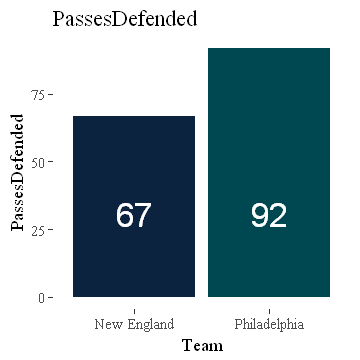

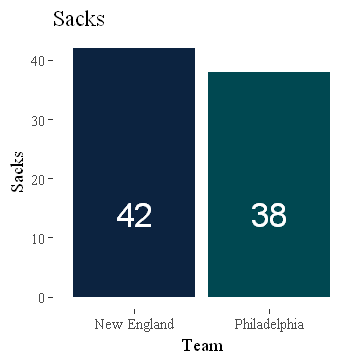

In [30]:
for (i in colnames(combined)[3:(length(colnames(combined))-1)]) {
    print(compare_teams(i))
}

We see, that the stats are often close together. Philly played more forth downs, so they are more likely to take more risks, but also need more downs to achieve a new first down. The Pass Defence of Philly is better than the Patriots and the Defense was able to score 5 Touchdowns. Next I rebuild some figures for the Dashboard.

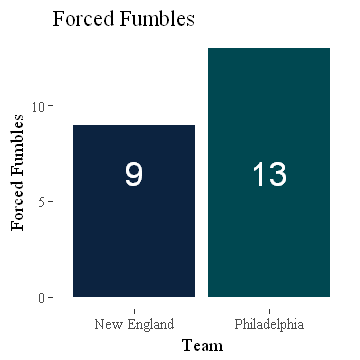

In [31]:
options(repr.plot.width=3, repr.plot.height=3)
combined %>%
    filter(Superbowl != 'dropped out') %>%
    ggplot(aes(x = Team, y = ForcedFumbles, fill = Superbowl)) +
    geom_bar(stat = 'identity') +
    ggtitle("Forced Fumbles") +
    xlab("Team") +
    ylab("Forced Fumbles") + 
    scale_fill_manual(values=colors[2:3], guide = F) +
    geom_text(aes(x = Team, y = max(ForcedFumbles)/2, label = ForcedFumbles),color = 'white', size = 7) +
    theme_tufte()

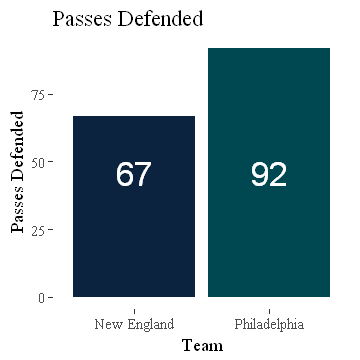

In [32]:
options(repr.plot.width=3, repr.plot.height=3)
combined %>%
    filter(Superbowl != 'dropped out') %>%
    ggplot(aes(x = Team, y = PassesDefended, fill = Superbowl)) +
    geom_bar(stat = 'identity') +
    ggtitle("Passes Defended") +
    xlab("Team") +
    ylab("Passes Defended") + 
    scale_fill_manual(values=colors[2:3], guide = F) +
    geom_text(aes(x = Team, y = max(PassesDefended)/2, label = PassesDefended),color = 'white', size = 7) +
    theme_tufte()

# Simulating the Game

## Aproach 1: Variant of the 'Practical Data Science Cookbook' by Tony Ojeda and others

In their Book 'Practical Data Science Cookbook' Tony Ojeda and Co simulate a season based on indexes of the seasons's data. They chose those indexes based on the Yards stats. I want to vary this approach by looking at the correlations of the measures and build an offensive and defensive index. So first we build a correlation plot and then we chose what variables might contribute to the indexes and the weights are chosen according to the correlation index.

Warning message:
"Removed 276 rows containing missing values (geom_point)."Warning message:
"Removed 276 rows containing missing values (geom_text)."

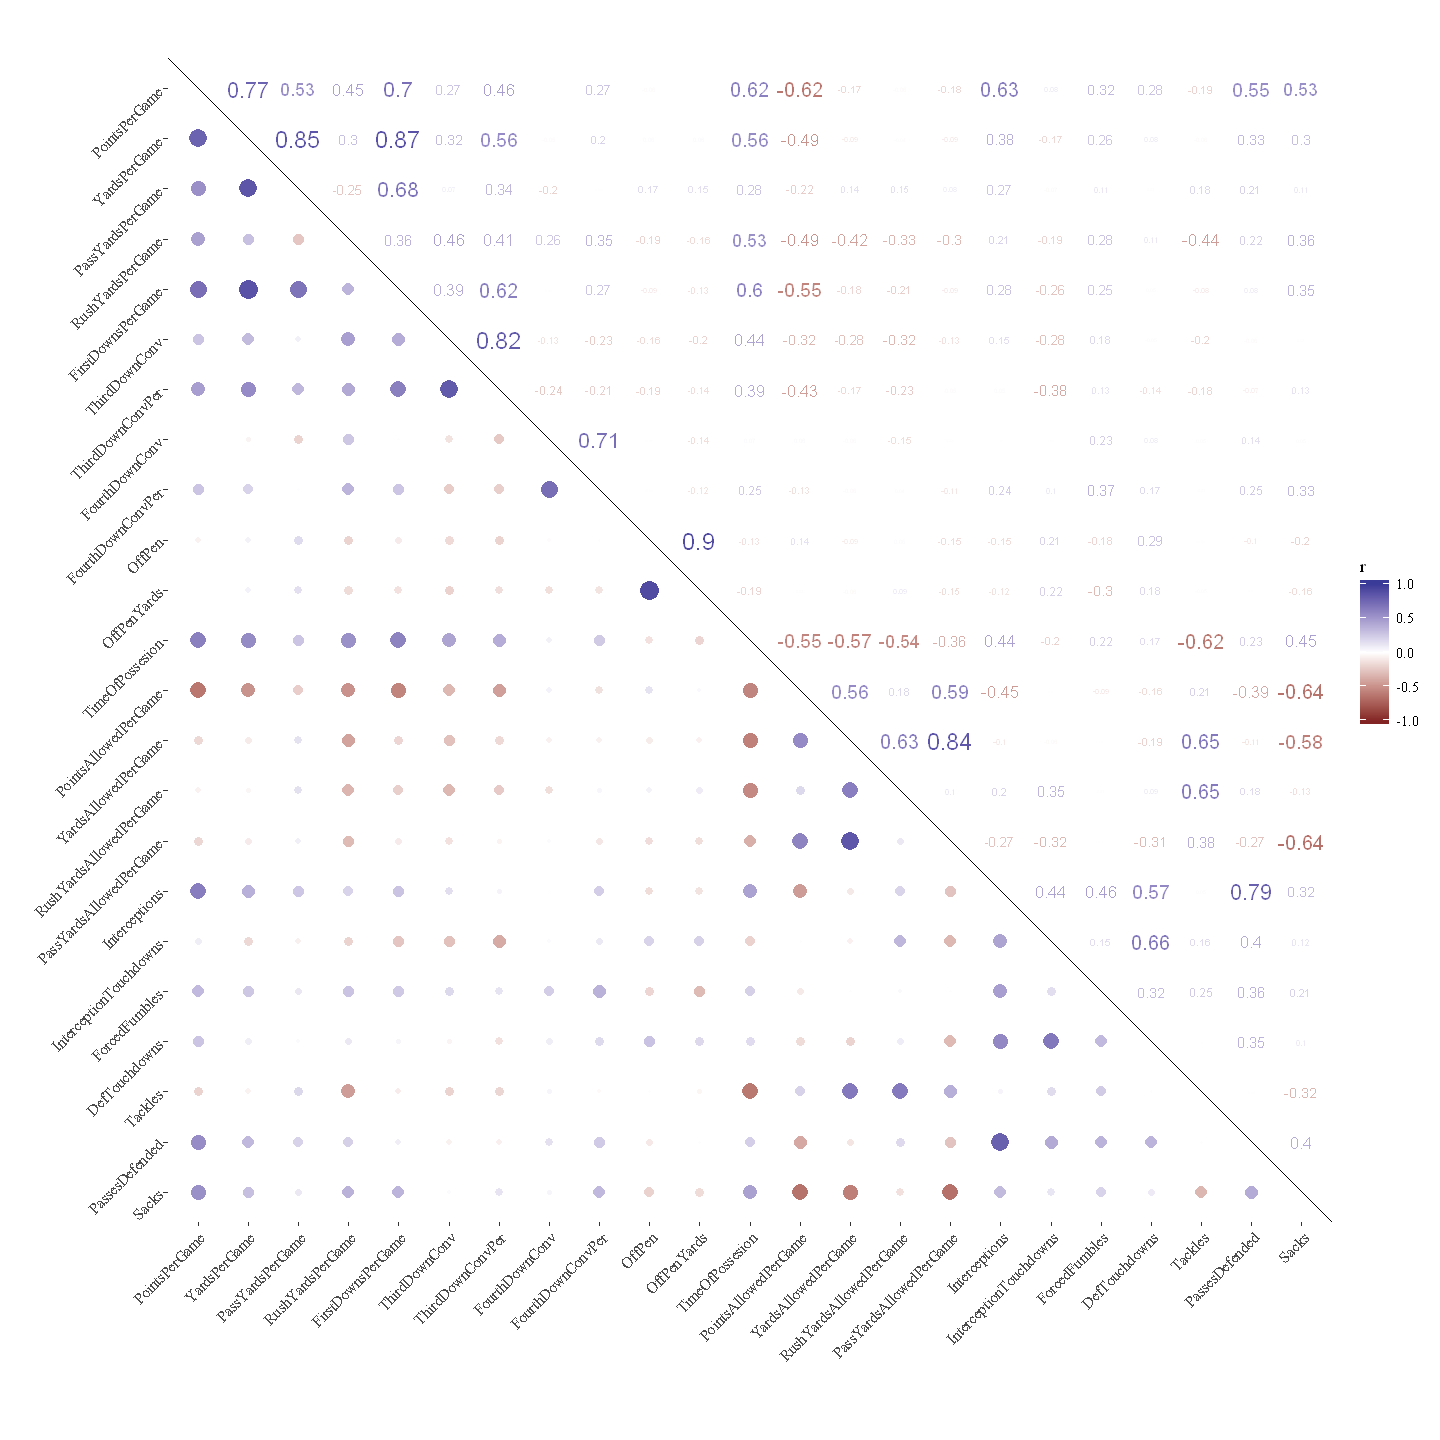

In [33]:
options(repr.plot.width=12, repr.plot.height=12)
cor_list <- function(x) {
  L <- M <- cor(x)
  
  M[lower.tri(M, diag = TRUE)] <- NA
  M <- melt(M)
  names(M)[3] <- "points"
  
  L[upper.tri(L, diag = TRUE)] <- NA
  L <- melt(L)
  names(L)[3] <- "labels"
  
  merge(M, L)
}

# Calculate xx with cor_list
library(dplyr)
xx <- combined %>%
  do(cor_list(.[3:(length(colnames(combined))-1)])) 

# Finish the plot
ggplot(xx, aes(x = Var1, y = Var2)) +
  geom_point(aes(col = points, size = abs(points)), shape = 16) +
  geom_text(aes(col = labels,  size = abs(labels), label = round(labels, 2))) +
  scale_size(range = c(0, 5)) +
  scale_color_gradient2("r", limits = c(-1, 1)) +
  scale_y_discrete("", limits = rev(levels(xx$Var1))) +
  scale_x_discrete("") +
  guides(size = FALSE) +
  geom_abline(slope = -1, intercept = nlevels(xx$Var1) + 1) +
  coord_fixed() +
  theme_tufte() +
  theme(axis.text.y = element_text(angle = 45, hjust = 1),
        axis.text.x = element_text(angle = 45, hjust = 1),
        strip.background = element_blank()) 

In [34]:
# Constructing indexes to measure offensive and defensive strength
# Pass (0.53)
combined$OPassStrength <- max(combined$PassYardsPerGame) - combined$PassYardsPerGame
combined$OPassStrength <- (1 - combined$OPassStrength/(max(combined$OPassStrength))) * 100
# Rush (0.45)
combined$ORushStrength <- max(combined$RushYardsPerGame) - combined$RushYardsPerGame
combined$ORushStrength <- (1 - combined$ORushStrength/(max(combined$ORushStrength))) * 100
# First Downs (0.7)
combined$O1stDStrength <- max(combined$FirstDownsPerGame) - combined$FirstDownsPerGame
combined$O1stDStrength <- (1 - combined$O1stDStrength/(max(combined$O1stDStrength))) * 100
# Time of Possesion (0.62)
combined$OTime <- max(combined$TimeOfPossesion) - combined$TimeOfPossesion
combined$OTime <- (1 - combined$OTime/(max(combined$OTime))) * 100
# Interception Strength (0.63)
combined$OInterception <- max(combined$Interceptions) - combined$Interceptions
combined$OInterception <- (1 - combined$OInterception/(max(combined$OInterception))) * 100

# Model OffenseStrength
combined <- combined %>%
    mutate(OStrength = 0.53 * OPassStrength +
                       0.45 * ORushStrength +
                       0.7 * O1stDStrength +
                       0.62 * OTime +
                       0.63 * OInterception)
combined <- combined %>%
    mutate(OStrength = OStrength / max(combined$OStrength))

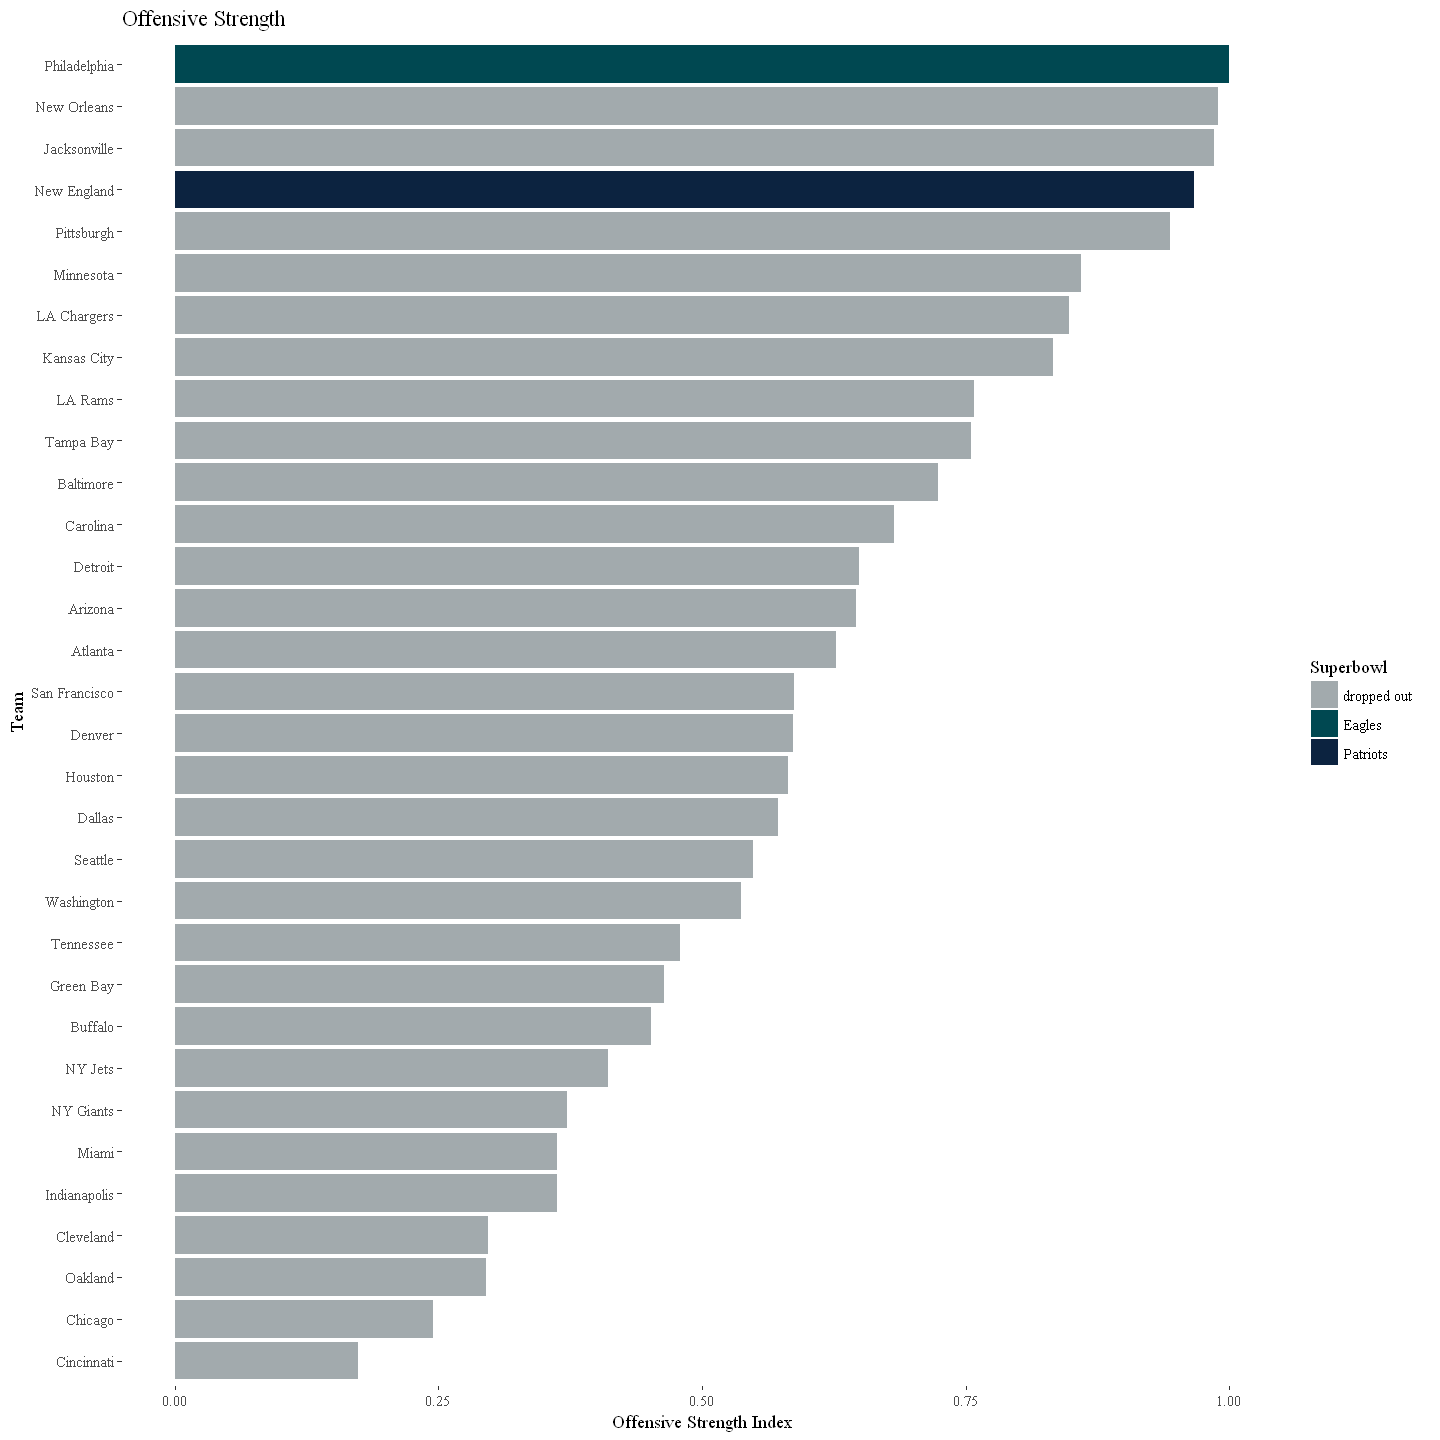

In [35]:
combined %>%
    ggplot(aes( x = reorder(Team, OStrength), y = OStrength, fill = Superbowl)) +
    geom_bar(stat = "identity") +
    coord_flip() +
    ggtitle("Offensive Strength") +
    xlab("Team") +
    ylab("Offensive Strength Index") + 
    scale_fill_manual(values=colors) +
    theme_tufte()

In [36]:
# Constructing indexes to measure offensive and defensive strength
# Pass (0.59)
combined$DPassStrength <- max(combined$PassYardsAllowedPerGame) - combined$PassYardsAllowedPerGame
combined$DPassStrength <- (1 - combined$DPassStrength/(max(combined$DPassStrength))) * 100
# Rush (0.16)
combined$DRushStrength <- max(combined$RushYardsAllowedPerGame) - combined$RushYardsAllowedPerGame
combined$DRushStrength <- (1 - combined$DRushStrength/(max(combined$DRushStrength))) * 100
# Interception Strength (0.45) (already calculated)

# Time of Possesion (0.55) (already calculated)

# Sack Strength (0.64)
combined$DSacks <- max(combined$Sacks) - combined$Sacks
combined$DSacks <- (1 - combined$DSacks/(max(combined$DSacks))) * 100

# Model OffenseStrength
combined <- combined %>%
    mutate(DStrength = 0.59 * DPassStrength +
                       0.16 * DRushStrength +
                       0.45 * OInterception +
                       0.55 * OTime +
                       0.64 * DSacks)
combined <- combined %>%
    mutate(DStrength = DStrength / max(combined$DStrength))

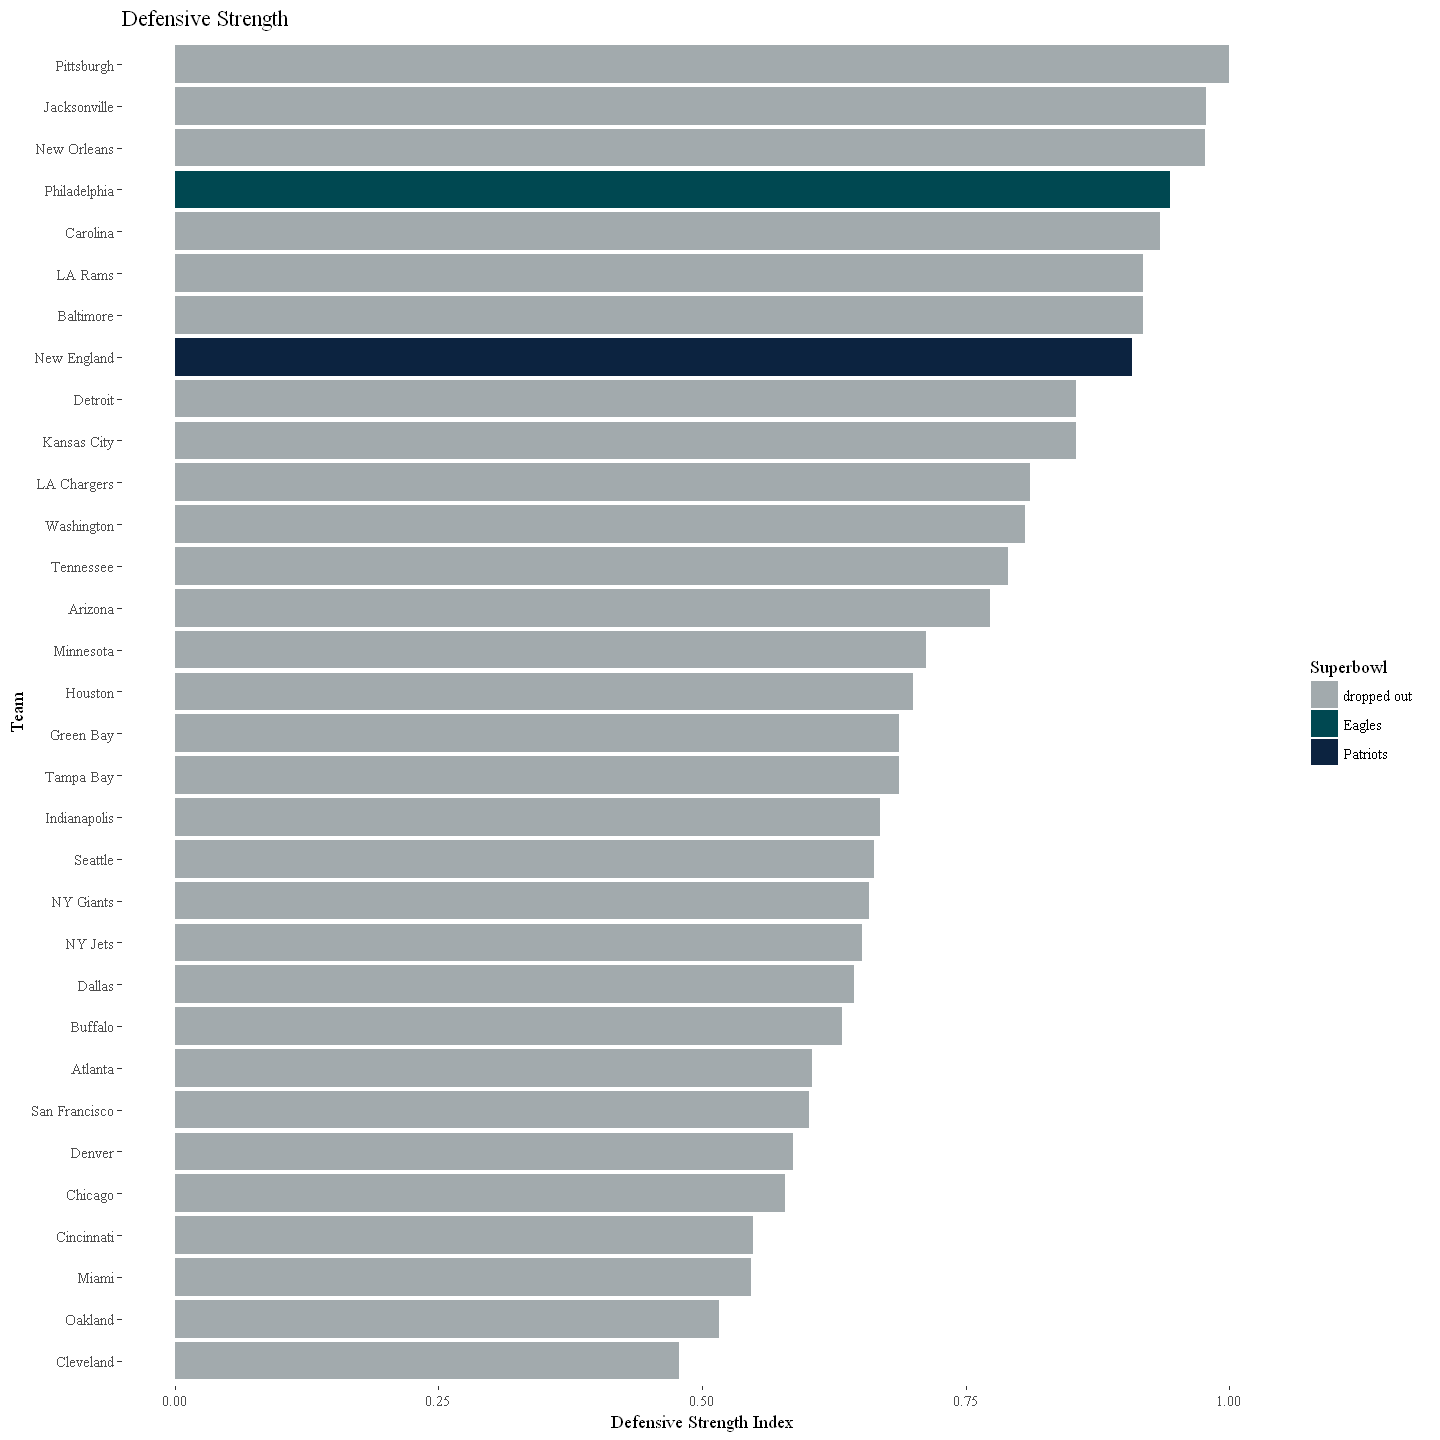

In [37]:
combined %>%
    ggplot(aes( x = reorder(Team, DStrength), y = DStrength, fill = Superbowl)) +
    geom_bar(stat = "identity") +
    coord_flip() +
    ggtitle("Defensive Strength") +
    xlab("Team") +
    ylab("Defensive Strength Index") + 
    scale_fill_manual(values=colors) +
    theme_tufte()

In [38]:
# Comparing the Offensive Matchuup for the Patriots
Patriots_Matchup <- combined$OStrength[combined$Team == "New England"] - combined$DStrength[combined$Team == "Philadelphia"]
Patriots_Matchup

[1] 0.02278997

In [39]:
# Comparing the Offensive Matchuup for the Eagles
Eagles_Matchup <- combined$OStrength[combined$Team == "Philadelphia"] - combined$DStrength[combined$Team == "New England"]
Eagles_Matchup

[1] 0.09245504

In [40]:
# What Team will win?
if (Patriots_Matchup > Eagles_Matchup) {
    print("Patriots will win the Superbowl")
} else { print("Eagles will win the Supwerbowl")}

[1] "Eagles will win the Supwerbowl"


Warning message:
"Removed 3 rows containing missing values (geom_point)."Warning message:
"Removed 3 rows containing missing values (geom_text)."

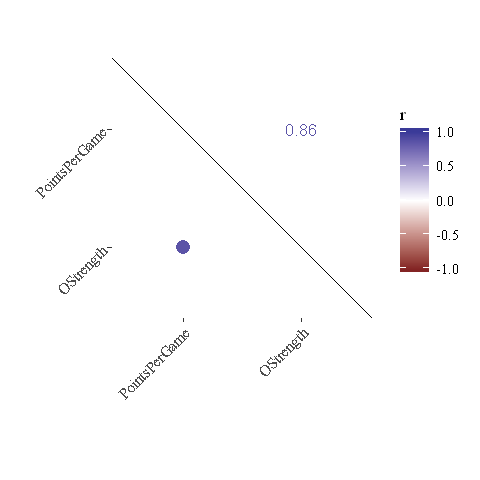

In [43]:
options(repr.plot.width=4, repr.plot.height=4)
# Test Model in Corr Matrix
xx <- combined %>%
  select(PointsPerGame, OStrength) %>%
   do(cor_list(.[1:2])) 
     
ggplot(xx, aes(x = Var1, y = Var2)) +
  geom_point(aes(col = points, size = abs(points)), shape = 16) +
  geom_text(aes(col = labels,  size = abs(labels), label = round(labels, 2))) +
  scale_size(range = c(0, 5)) +
  scale_color_gradient2("r", limits = c(-1, 1)) +
  scale_y_discrete("", limits = rev(levels(xx$Var1))) +
  scale_x_discrete("") +
  guides(size = FALSE) +
  geom_abline(slope = -1, intercept = nlevels(xx$Var1) + 1) +
  coord_fixed() +
  theme_tufte() +
  theme(axis.text.y = element_text(angle = 45, hjust = 1),
        axis.text.x = element_text(angle = 45, hjust = 1),
        strip.background = element_blank()) 

Warning message:
"Removed 3 rows containing missing values (geom_point)."Warning message:
"Removed 3 rows containing missing values (geom_text)."

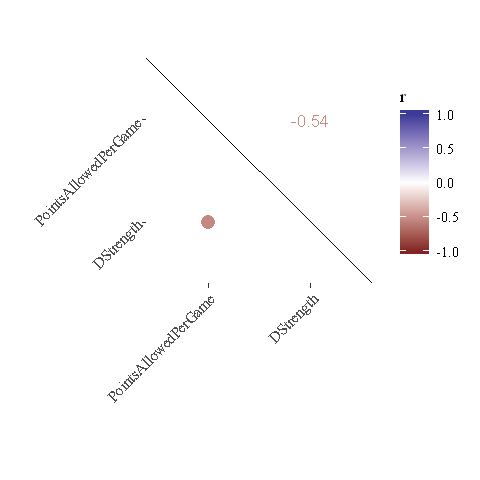

In [44]:
options(repr.plot.width=4, repr.plot.height=4)
# Test Model in Corr Matrix
xx <- combined %>%
  select(PointsAllowedPerGame, DStrength) %>%
   do(cor_list(.[1:2])) 
     
ggplot(xx, aes(x = Var1, y = Var2)) +
  geom_point(aes(col = points, size = abs(points)), shape = 16) +
  geom_text(aes(col = labels,  size = abs(labels), label = round(labels, 2))) +
  scale_size(range = c(0, 5)) +
  scale_color_gradient2("r", limits = c(-1, 1)) +
  scale_y_discrete("", limits = rev(levels(xx$Var1))) +
  scale_x_discrete("") +
  guides(size = FALSE) +
  geom_abline(slope = -1, intercept = nlevels(xx$Var1) + 1) +
  coord_fixed() +
  theme_tufte() +
  theme(axis.text.y = element_text(angle = 45, hjust = 1),
        axis.text.x = element_text(angle = 45, hjust = 1),
        strip.background = element_blank()) 

The Offensive Strength correlates well with the Points Per Game. But for the Defensive strength we only see a slight correlation. This implies that the constructed offensive idnex is more meaningful than the defensive index. 

## Aproach 2: Get the score by multivariate linear regression

Game plan: 

* We build a multivariate model by training the seasons data to predict the Points per Game use backpropagation 
* We hold out the Patriots and Eagles Data as a test set. 
* We use the prediction on the Points per game as 

In [86]:
# Lets Try to build a model using multivariate linear regression
training <- combined %>%
    filter(Superbowl == 'dropped out') %>%
    select(-Team, -Games, -Superbowl, -OPassStrength, -ORushStrength, -O1stDStrength, -OInterception, -OTime, -OStrength, -DPassStrength, -DRushStrength, -DSacks, -DStrength)
head(training)

PointsPerGame,YardsPerGame,PassYardsPerGame,RushYardsPerGame,FirstDownsPerGame,ThirdDownConv,ThirdDownConvPer,FourthDownConv,FourthDownConvPer,OffPen,...,YardsAllowedPerGame,RushYardsAllowedPerGame,PassYardsAllowedPerGame,Interceptions,InterceptionTouchdowns,ForcedFumbles,DefTouchdowns,Tackles,PassesDefended,Sacks
29.9,373.5,251.4,122.1,19.4,88,41.1,5,41.7,107,...,339.5,122.3,217.2,18,3,17,3,656,96,48
28.0,400.3,270.9,129.4,20.8,73,37.6,12,80.0,105,...,336.5,111.7,224.8,20,2,15,3,623,102,42
26.1,373.6,232.3,141.4,20.8,85,37.4,10,76.9,112,...,286.1,116.3,169.9,21,2,17,7,633,81,55
25.9,389.3,270.4,118.9,20.1,78,39.2,3,30.0,118,...,365.1,118.1,247.0,16,0,11,3,651,86,31
25.6,355.7,279.4,76.3,18.5,81,38.8,1,11.1,104,...,355.8,112.5,243.3,19,3,13,5,670,79,35
25.4,387.6,283.4,104.2,21.8,92,44.0,3,37.5,101,...,306.9,105.8,201.1,16,0,11,0,612,80,56


In [93]:
SL <- 0.05

backwardElimination <- function(x, sl) {
    numVars <- length(x)
    for (i in c(1:numVars)){
      regressor <- lm(formula = PointsPerGame ~ ., data = x)
      maxVar <- max(coef(summary(regressor))[c(2:numVars), "Pr(>|t|)"])
      if (maxVar > sl){
        j <- which(coef(summary(regressor))[c(2:numVars), "Pr(>|t|)"] == maxVar)
        x <- x[, -(j+1)]
      }
      numVars <- numVars - 1
    }
    return(regressor)
  }
regressor2 <- backwardElimination(training, SL)
summary(regressor2)


Call:
lm(formula = PointsPerGame ~ ., data = x)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6127 -1.2455  0.1046  1.2066  3.5024 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -11.49218    5.14594  -2.233  0.03512 *  
ThirdDownConv     -0.19103    0.06554  -2.915  0.00759 ** 
ThirdDownConvPer   0.80582    0.16104   5.004 4.12e-05 ***
OffPen             0.05030    0.02431   2.069  0.04948 *  
Interceptions      0.54039    0.08343   6.477 1.07e-06 ***
Sacks              0.13483    0.04382   3.077  0.00516 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.8 on 24 degrees of freedom
Multiple R-squared:  0.8123,	Adjusted R-squared:  0.7732 
F-statistic: 20.77 on 5 and 24 DF,  p-value: 5.209e-08


In [94]:
superbowl2 <- combined %>%
    filter(Superbowl != 'dropped out') %>%
    select(Team, YardsPerGame, PassYardsPerGame, ThirdDownConv, ThirdDownConvPer, OffPen, YardsAllowedPerGame,  RushYardsAllowedPerGame, Interceptions, Sacks)

predictedPoints <- predict(regressor2, newdata=superbowl2 %>% select(-Team))
Result2 <- data.frame(Team = superbowl2$Team, Points = round(predictedPoints))
Result2

Team,Points
New England,22
Philadelphia,25


## Predict Points Allowed

In [97]:
# Swap Columns
training <- training[,c(13,1:12,14:23)]
colnames(training)

[1] "PointsAllowedPerGame"    "PointsPerGame"          
 [3] "YardsPerGame"            "PassYardsPerGame"       
 [5] "RushYardsPerGame"        "FirstDownsPerGame"      
 [7] "ThirdDownConv"           "ThirdDownConvPer"       
 [9] "FourthDownConv"          "FourthDownConvPer"      
[11] "OffPen"                  "OffPenYards"            
[13] "TimeOfPossesion"         "YardsAllowedPerGame"    
[15] "RushYardsAllowedPerGame" "PassYardsAllowedPerGame"
[17] "Interceptions"           "InterceptionTouchdowns" 
[19] "ForcedFumbles"           "DefTouchdowns"          
[21] "Tackles"                 "PassesDefended"         
[23] "Sacks"

In [102]:
SL <- 0.05
backwardElimination <- function(x, sl) {
    numVars <- length(x)
    for (i in c(1:numVars)){
      regressor <- lm(formula = PointsAllowedPerGame ~ ., data = x)
      maxVar <- max(coef(summary(regressor))[c(2:numVars), "Pr(>|t|)"])
      if (maxVar > sl){
        j <- which(coef(summary(regressor))[c(2:numVars), "Pr(>|t|)"] == maxVar)
        x <- x[, -(j+1)]
      }
      numVars <- numVars - 1
    }
    return(regressor)
  }
regressor3 <- backwardElimination(training, SL)
summary(regressor3)


Call:
lm(formula = PointsAllowedPerGame ~ ., data = x)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1453 -0.6124  0.1318  0.6725  2.0518 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          38.089115   7.286133   5.228 4.08e-05 ***
YardsPerGame        -26.274891   6.086236  -4.317 0.000335 ***
PassYardsPerGame     26.281972   6.089594   4.316 0.000336 ***
RushYardsPerGame     26.204947   6.081114   4.309 0.000341 ***
ThirdDownConvPer     -0.160096   0.074290  -2.155 0.043527 *  
YardsAllowedPerGame   0.071887   0.013830   5.198 4.37e-05 ***
Interceptions        -0.320629   0.065078  -4.927 8.13e-05 ***
ForcedFumbles         0.405178   0.096149   4.214 0.000426 ***
Tackles              -0.039540   0.008415  -4.699 0.000138 ***
Sacks                -0.087091   0.036735  -2.371 0.027909 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.143 on 20 degrees of freedom
Multiple R-squared

In [100]:
superbowl3 <- combined %>%
    filter(Superbowl != 'dropped out') %>%
    select(Team, YardsPerGame, PassYardsPerGame, RushYardsPerGame, ThirdDownConvPer, YardsAllowedPerGame, Interceptions, ForcedFumbles,  Tackles, Sacks)

predictedPointsAllowed <- predict(regressor3, newdata=superbowl3 %>% select(-Team))
Result3 <- data.frame(Team = superbowl2$Team[2:1], Points = round(predictedPointsAllowed))
Result3

Team,Points
Philadelphia,21
New England,18


In [107]:
# Average both results to predict final Result!

result <- rbind(Result2, Result3)

result %>% group_by(Team) %>% summarize(Points = round(mean(Points)))

Team,Points
New England,20
Philadelphia,23
